In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
log_sigma = np.arange(-10, 4, 0.01)
alpha = -1 / (2*np.exp(log_sigma)**2)
alpha = alpha[:, None]

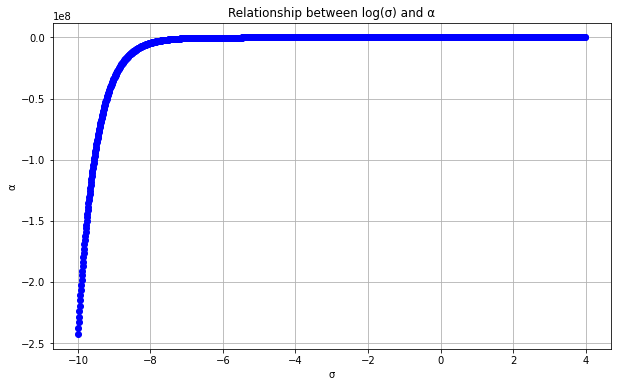

In [3]:
# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(log_sigma, alpha, marker='o', linestyle='-', color='b')
plt.title('Relationship between log(σ) and α')
plt.xlabel('σ')
plt.ylabel('α')
plt.grid(True)
plt.show()

In [4]:
def get_index(array, value):
    return np.argmin(np.abs(array - value))

In [5]:
z = (np.random.uniform(size=(100, 2))*2)-1
e = (np.random.uniform(size=(100, 2))*2)-1

distance = (z @ e.T) ** 2
distance = distance.reshape(-1)
print(distance.shape)

(10000,)


In [6]:
indexes = [get_index(log_sigma, value) for value in [-5.61, -4.61, -3.61, -2.61, -1.61, -0.61, 0.61, 1.61]]

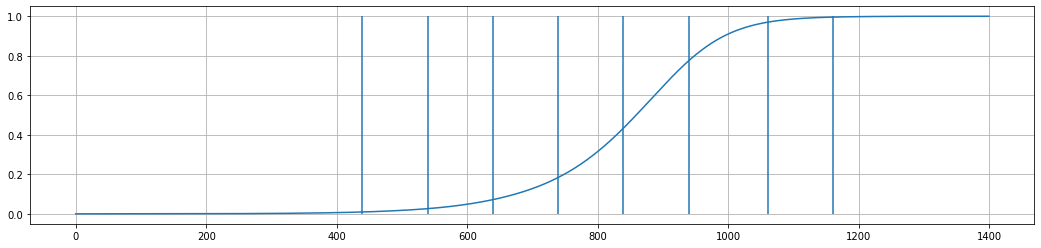

In [7]:
mean = np.exp(alpha * distance).mean(axis=1)
plt.figure(figsize=[18, 4])
plt.plot(mean)
plt.vlines(indexes, ymin=0, ymax=1.0)
plt.grid()
plt.show()

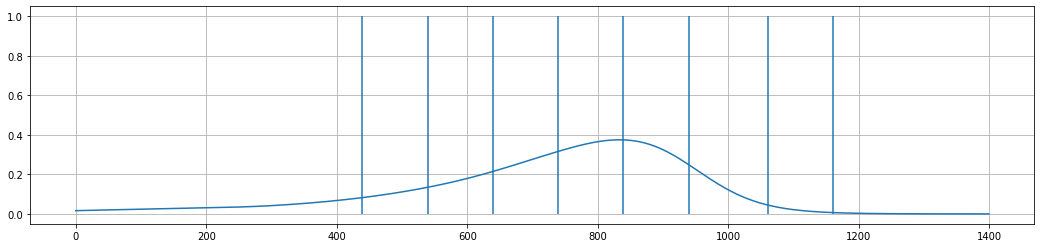

833
-1.6700000000001776
0.18824706563871335


In [8]:
std = np.exp(alpha * distance).std(axis=1)
plt.figure(figsize=[18, 4])
plt.plot(std)
plt.vlines(indexes, ymin=0, ymax=1.0)
plt.grid()
plt.show()
print(np.argmax(std))
print(log_sigma[np.argmax(std)])
print(np.exp(log_sigma[np.argmax(std)]))

### Gradient

In [9]:
z = (np.random.uniform(size=(100, 2))*2)-1
e = (np.random.uniform(size=(100, 2))*2)-1

distance = (z @ e.T) ** 2
print(distance.shape)

(100, 100)


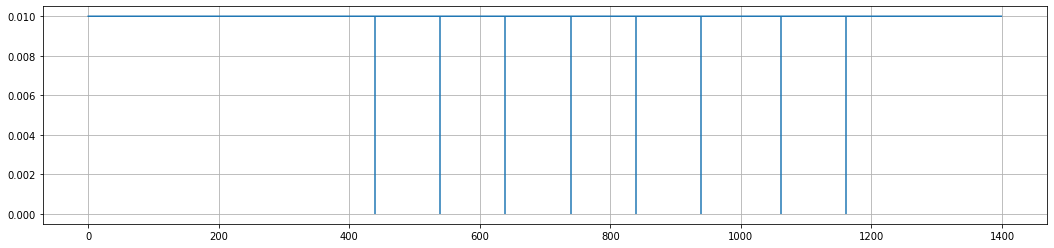

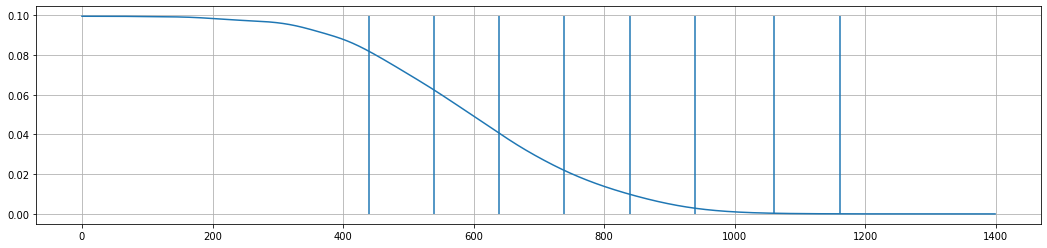

In [10]:
from scipy.special import softmax

grad = softmax(alpha[:, :, None] * distance, axis=2)
grad_mean = grad.mean(axis=2).mean(axis=1)
grad_std = grad.std(axis=2).mean(axis=1)

plt.figure(figsize=[18, 4])
plt.plot(grad_mean)
plt.vlines(indexes, ymin=0, ymax=max(grad_mean))
plt.grid()
plt.show()

plt.figure(figsize=[18, 4])
plt.plot(grad_std)
plt.vlines(indexes, ymin=0, ymax=max(grad_std))
plt.grid()
plt.show()